# 난 스케치를 할 테니 너는 채색을 하거라
---
**GAN(Generative Adversarial Networks)**
- 2014년 GAN이 세상에 나타난 이후, Computer Vision 및 다양한 분야에서 많은 관심을 받아 활발하게 응용되면서 빠르게 발전  
- 이미지 생성 모델로 사용되는 일반적인 GAN에 조건을 부여하여 내가 원하는 유형의 이미지를 생성  
---
## 조건 없는 생성모델(Unconditional Generative Model), GAN  

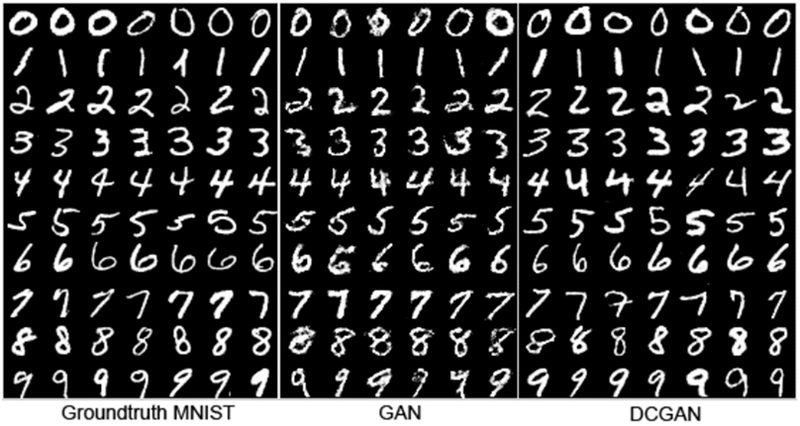  

"7"이라는 이미지를 만들고자 MNIST 데이터셋을 이용해 GAN을 열심히 학습시켰습니다.  
학습이 완료된 모델을 이용해 "7"이라 쓰여있는 이미지를 얻기 위한 방법  
- 그저 다양한 노이즈를 계속 입력으로 넣어보고 "7"이라는 숫자 이미지가 생성되길 기다리는 것
- 잘 학습된 GAN을 이용해 실제 이미지를 생성할 때 바로 내가 원하는 종류의 이미지를 바로 생성해 내지 못함
- 일반적인 GAN과 같은 unconditioned generative model은 내가 생성하고자 하는 데이터에 대해 제어하기 힘듦

우리가 원하는 이미지를 바로바로 생성해 내기 위해서는 어떤 방법을 이용해야 할까?  
GAN이라는 생성 모델에 내가 원하는 이미지를 만들기 위한 특정 조건을 줄 수는 없을까?  

**기타 GAN의 문제점**
- 생성자와 판별자가 경쟁하는 과정에서 균형을 유지하기 어려워 학습이 불안정해지는 경향
- 생성자가 판별자를 속이기 어려워지면서 동일하거나 유사한 이미지를 반복적으로 생성하는 **Model collapsing 문제**

### Conditional Generative Adversarial Nets (cGAN)
GAN이 가진 생성 과정의 불편함을 해소하여, 내가 원하는 종류의 이미지를 생성할 수 있도록 고안된 방법  

#### GAN의 목적 함수
**GAN 구조**
- Generator 및 Discriminator라 불리는 두 신경망이 minimax game을 통해 서로 경쟁하며 발전
- 이를 아래와 같은 식으로 나타낼 수 있으며 Generator는 이 식을 최소화하려, Discriminator는 이 식을 최대화하려 학습  
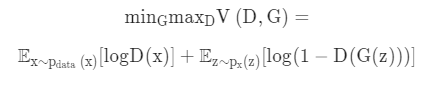  
- z : 임의 노이즈
- D : Discriminator >> 식의 최대화를 목적으로 학습
- G : Generator >> 식의 최소화를 목적으로 학습  

**Discriminator : 이 식을 최대화 하려면**  
- 우변의 + 를 기준으로 양쪽의 항 (logD(x)) 및 log(1−D(G(z)))이 모두 최대가 되게 해야 함
- 이를 위해서 두 개의 log가 1이 되게 해야 함
- D(x)는 1이 되도록, D(G(z))는 0이 되도록 해야 함
- 진짜 데이터(x)를 진짜로, 가짜 데이터(G(z))를 가짜로 정확히 예측하도록 학습

**Generator : 식을 최소화 하려면**  
- 마지막 항 log(1−D(G(z)))만을 최소화 (우변의 첫 번째 항은 관련이 없다)
- log 내부가 0이 되도록 해야 함 == D(G(z))가 1이 되도록 한다
- z를 입력받아 생성한 데이터 G(z)를 D가 진짜 데이터라고 예측할 만큼 진짜 같은 가짜 데이터를 만들도록 학습

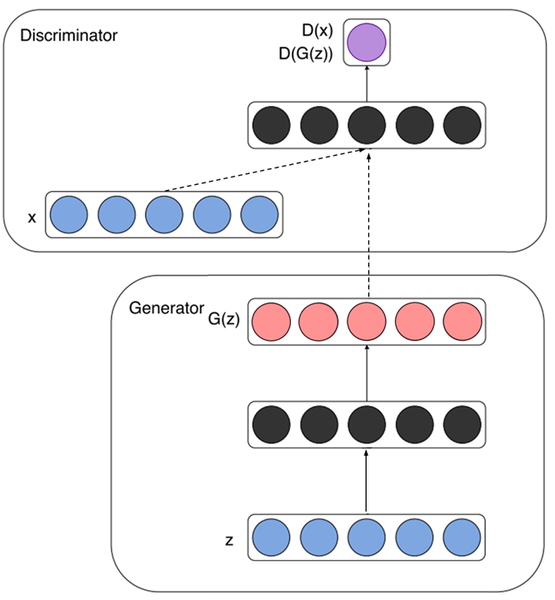  

#### cGAN의 목적함수
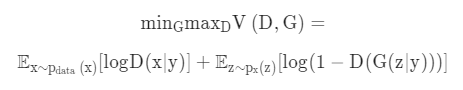  
- D(x)와 G(z)가 각각 D(x∣y), G(z∣y)로 y 조건부 함수로 변경됨
- Generator가 어떠한 노이즈 z를 입력받았을 때, 특정 조건 y가 함께 입력 >> y를 통해 z 이미지 생성 방향을 제어 가능
- y는 임의 노이즈 입력(z) 가이드

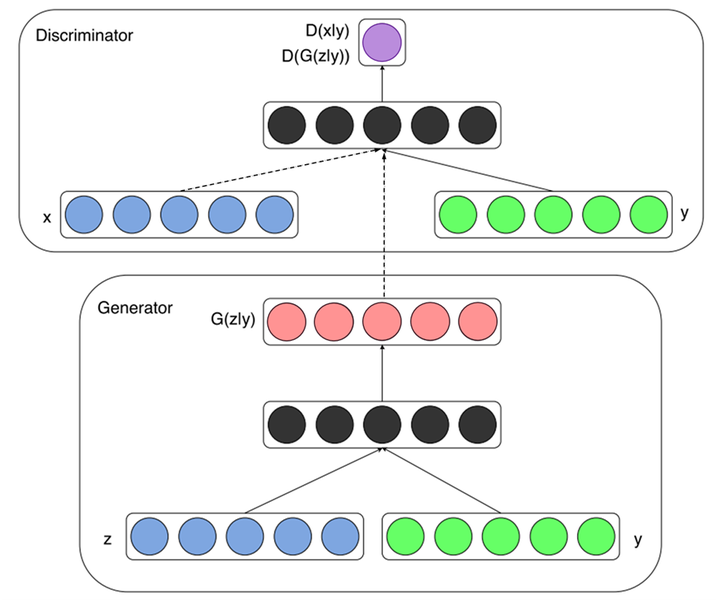
**Generator**  
- 노이즈 z(파란색)와 추가 정보 y(녹색)을 함께 입력받아 Generator 내부에서 결합되어 representation(검정색)으로 변환
- 가짜 데이터 G(z∣y)를 생성
- MNIST나 CIFAR-10 등의 데이터셋에 대해 학습시키는 경우 y는 레이블 정보(일반적으로 one-hot 벡터를 입력)

**Discriminator**  
- 실제 데이터 x와 Generator가 생성한 가짜 데이터 G(z∣y)를 각각 입력받으며, y정보가 각각 함께 입력
- 진짜와 가짜를 식별  
- MNIST나 CIFAR-10 등의 데이터셋에 대해 학습시키는 경우 실제 데이터 x와 y는 알맞은 한 쌍을 이뤄야 함
- Generator에 입력된 y와 Discriminator에 입력되는 y는 동일한 레이블을 나타내야 함

---
### Generator 구성하기

#### 데이터 준비
- tensorflow-dataset 라이브러리
- MNIST 데이터셋

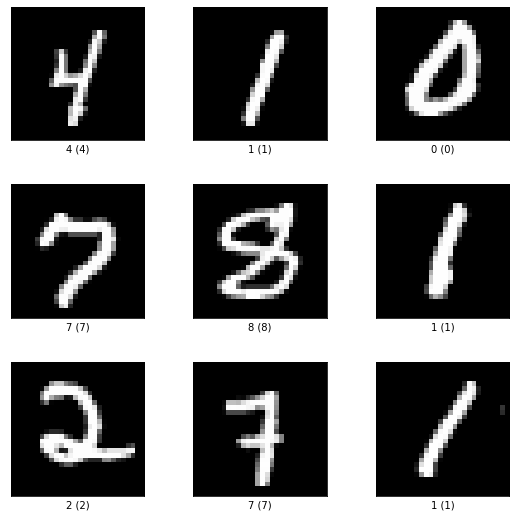

In [2]:
import tensorflow_datasets as tfds
mnist, info =  tfds.load("mnist", split="train", with_info=True)
fig = tfds.show_examples(mnist, info)

#### 학습 전에 필요한 몇 가지 처리를 수행하는 함수를 정의
- 이미지 픽셀 값을 -1~1 사이의 범위로 변경 
    정규화된 픽셀 값을 사용함으로써 모델의 안정성이 향상
    데이터 분포의 평균을 0으로 맞추고 단위 분산을 갖도록 조정하여 모델의 학습 효율을 향상
- 레이블 정보 원-핫 인코딩(one-hot encoding) 처리
- GAN과 cGAN 각각을 실험해 보기 위해 label 정보 사용 유무에 따라 gan_preprocessing()과 cgan_preprocessing() 두 가지 함수를 구성

Label : tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)
Image Min/Max : -1.0 1.0


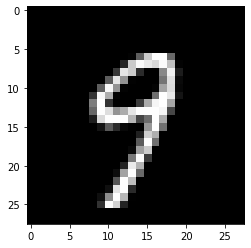

In [7]:
import tensorflow as tf

BATCH_SIZE = 128

# GAN : label 정보 미사용
def gan_preprocessing(data):
    image = data["image"]
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

# cGAN : label 정보 사용
def cgan_preprocessing(data):
    image = data["image"]
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    
    label = tf.one_hot(data["label"], 10)
    return image, label

gan_datasets = mnist.map(gan_preprocessing).shuffle(1000).batch(BATCH_SIZE)
cgan_datasets = mnist.map(cgan_preprocessing).shuffle(100).batch(BATCH_SIZE)

# 테스트: 한 개 데이터셋만 선택
for i,j in cgan_datasets : break
    
# 이미지 i와 라벨 j가 일치하는지 확인
print("Label :", j[0])
print("Image Min/Max :", i.numpy().min(), i.numpy().max())

import matplotlib.pyplot as plt

plt.imshow(i.numpy()[0,...,0], plt.cm.gray)

#### GAN Generator 구성
**Tensorflow2의 Subclassing 방법**
- tensorflow.keras.Model 을 상속받아 클래스 생성
- 일반적으로 __init__() 메서드 안에서 레이어 구성을 정의
- 구성된 레이어를 call() 메서드에서 사용해 forward propagation을 진행

In [31]:
from tensorflow.keras import layers, Input, Model

# GAN 클래스
class GeneratorGAN(Model):
    
    def __init__(self):
        super(GeneratorGAN, self).__init__()
        # 활성화함수를 'relu'를 사용하고 unit이 128인 Dense Layer를 정의해주세요,.
        self.dense_1 = layers.Dense(128, activation='relu')
        # 활성화함수를 'relu'를 사용하고 unit이 256인 Dense Layer를 정의해주세요.
        self.dense_2 = layers.Dense(256, activation='relu')
        # 활성화함수를 'relu'를 사용하고 unit이 512인 Dense Layer를 정의해주세요.
        self.dense_3 = layers.Dense(512, activation='relu')
        # 활성화함수를 하이퍼볼릭 탄젠트를 사용하고 unit이 256인 Dense Layer를 정의해주세요.
        self.dense_4 = layers.Dense(units=28 * 28 * 1, activation='tanh')
        # 모양일 (28,28,1)로 변경해주세요.
        self.reshape = layers.Reshape((28,28,1))

    def call(self, noise):
        out = self.dense_1(noise)
        out = self.dense_2(out)
        out = self.dense_3(out)
        out = self.dense_4(out)
        return self.reshape(out)

# cGAN 클래스
class GeneratorCGAN(Model):
    def __init__(self):
        super(GeneratorCGAN, self).__init__()
        
        self.dense_z = layers.Dense(256, activation='relu')
        self.dense_y = layers.Dense(256, activation='relu')
        self.combined_dense = layers.Dense(512, activation='relu')
        self.final_dense = layers.Dense(28 * 28 * 1, activation='tanh')
        self.reshape = layers.Reshape((28, 28, 1))

    def call(self, noise, label):
        # 노이즈에 Dense layer를 적용시킵니다.
        noise = self.dense_z(noise)
         # 라벨에 Dense layer를 적용시킵니다.
        label = self.dense_y(label)
        # 노이즈와 라벨을 pair가 되게 합친 다음 combined_dense를 적용
        out = self.combined_dense(tf.concat([noise, label], axis=-1))
        # 마지막 Dense Layer를 적용시킵니다.
        out = self.final_dense(out)
        return self.reshape(out)


---
## Discriminator 구성하기

### GAN Discriminator 구성하기
__init__()에 blocks라는 리스트를 하나 만들어 놓고  
for loop를 이용하여 필요한 레이어들을 차곡차곡 쌓아놓았습니다. 

이러한 방식을 이용하면 
각각의 fully-connected 레이어를 매번 정의하지 않아도 되므로 많은 레이어가 필요할 때 편리합니다. 

Discriminator의 입력은 Generator가 생성한 (28,28,1) 크기의 이미지이며, 

이를 fully-connected 레이어로 학습하기 위해 call()에서는 가장 먼저 layers.Flatten()이 적용됩니다. 

이어서 레이어들이 쌓여있는 blocks에 대해 for loop를 이용하여 레이어들을 순서대로 하나씩 꺼내 입력 데이터를 통과시킵니다. 

마지막 fully-connected 레이어를 통과하면 진짜 및 가짜 이미지를 나타내는 1개의 값이 출력됩니다.

In [32]:
class DiscriminatorGAN(Model):
    def __init__(self):
        super(DiscriminatorGAN, self).__init__()
                
        self.flatten = layers.Flatten()
        
        #해당 방식은 반복문을 활용해 layer를 쌓기 때문에 좋은 테크닉중 하나입니다,.
        self.blocks = []
        for f in [512, 256, 128, 1]:
            self.blocks.append(
                # 마지막 fully-connected 레이어 : 진짜 및 가짜 이미지를 나타내는 1개의 값 출력
                layers.Dense(f, activation=None if f==1 else "relu")
            )
        
    def call(self, x):
        # Generator가 생성한 (28,28,1) 크기의 이미지
        # 이를 fully-connected 레이어로 학습하기 위해 가장 먼저 layers.Flatten()이 적용
        x = self.flatten(x)
        for block in self.blocks:
            x = block(x)
        return x
    

### cGAN Discriminator 구성하기
**Maxout** 레이어 사용  
- 두 레이어 사이를 연결할 때, 여러 개의 fully-connected 레이어를 통과시켜 그 중 가장 큰 값을 가져오도록 한다. 

#### 2개의 fully-connected 레이어를 사용할 때 Maxout 식  
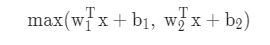  

이렇게 fully-connected 레이어를 2개만 사용한다면 다차원 공간에서 2개의 면이 교차된 모양의 activation function처럼 작동한다.  
다차원 공간은 시각화 하기가 어려운데, 차원을 낮춰 1차원 fully-connected 레이어라고 가정하면 아래처럼 2개의 직선으로 이루어진 activation function으로 나타낼 수 있다.

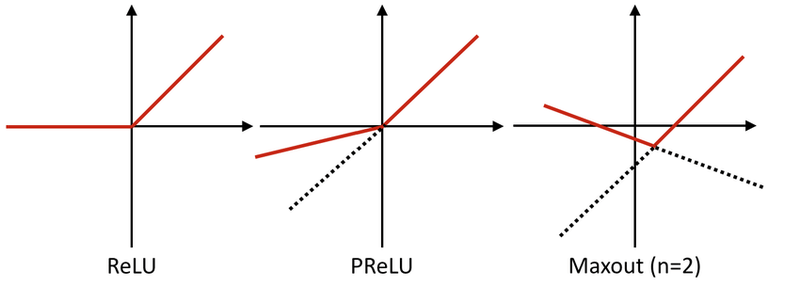  

사용하는 fully-connected 레이어 갯수가 늘어난다면 점점 곡선 형태인 activation function이 될 수 있다.  
차원을 늘리면 시각화 하기는 어렵지만 다차원 공간에 곡면을 나타낼 수 있다
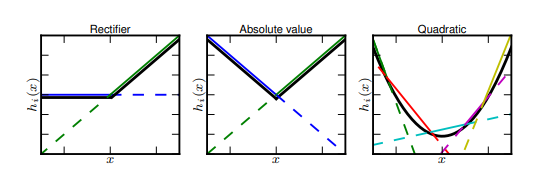  


In [33]:
# tensorflow.keras.layers.Layer 를 상속받아 레이어를 정의
class Maxout(layers.Layer):
    def __init__(self, units, pieces):
        super(Maxout, self).__init__()
        self.dense = layers.Dense(units*pieces, activation="relu")
        self.dropout = layers.Dropout(.5)    
        self.reshape = layers.Reshape((-1, pieces, units))
    
    def call(self, x):
        x = self.dense(x)
        x = self.dropout(x)
        x = self.reshape(x)
        return tf.math.reduce_max(x, axis=2)


Maxout 레이어를 구성할 때 units과 pieces의 설정이 필요  
- units 차원 수를 가진 fully-connected 레이어를 pieces개 만큼 만들고 그 중 최댓값을 출력  

예> 사용할 Maxout 레이어가 units=100, pieces=10으로 설정 시  
- 입력으로부터 100차원의 representation을 10개 만들고, 10개 중에서 최댓값을 가져와 최종 1개의 100차원 representation이 출력

In [34]:
# Maxout 레이어를 3번 사용하여 아래와 같이 쉽게 cGAN의 Discriminator를 구성
class DiscriminatorCGAN(Model):
    def __init__(self):
        super(DiscriminatorCGAN, self).__init__()
        self.flatten = layers.Flatten()
        
        self.image_block = Maxout(240, 5)
        self.label_block = Maxout(50, 5)
        self.combine_block = Maxout(240, 4)
        
        self.dense = layers.Dense(1, activation=None)
    
    def call(self, image, label):
        # Generator가 생성한 (28,28,1) 크기의 이미지가 입력 >> Flatten
        image = self.flatten(image) 
        # 이미지 입력 Maxout 레이어 통과
        image = self.image_block(image)
        # 레이블 입력 Maxout 레이어 통과
        label = self.label_block(label)
        # 서로 결합되어 Maxout 레이어 통과
        x = layers.Concatenate()([image, label])
        x = self.combine_block(x)
        # 진짜 및 가짜 이미지를 나타내는 1개의 값이 출력
        return self.dense(x)


---
## 학습 및 테스트하기
---
이전에 정의한 Generator 및 Discriminator를 이용해 MINST를 학습하고 각 모델로 직접 숫자 손글씨를 생성  

모델 학습에 공통적으로 필요한 **loss function**과 **optimizer**를 정의합니다.
- 진짜 및 가짜를 구별하기 위해 Binary Cross Entropy를 사용
- Adam optimizer를 이용해 학습


In [35]:
from tensorflow.keras import optimizers, losses

bce = losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return bce(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    return bce(tf.ones_like(real_output), real_output) + bce(tf.zeros_like(fake_output), fake_output)

gene_opt = optimizers.Adam(1e-4)
disc_opt = optimizers.Adam(1e-4)    


### GAN으로 MNIST 학습하기

In [36]:
gan_generator = GeneratorGAN()
gan_discriminator = DiscriminatorGAN()

# 하나의 배치 크기 데이터로 모델을 업데이트하는 함수 작성
# @tf.function()
def gan_step(real_images):
    # 입력으로 사용되는 노이즈를 100차원으로 설정
    noise = tf.random.normal([real_images.shape[0], 100])
    
    with tf.GradientTape(persistent=True) as tape:
        # Generator를 이용해 가짜 이미지 생성
        fake_images = gan_generator(noise)
        # Discriminator를 이용해 진짜 및 가짜이미지를 각각 판별
        real_out = gan_discriminator(real_images)
        fake_out = gan_discriminator(fake_images)
        # 각 손실(loss)을 계산
        gene_loss = generator_loss(fake_out)
        disc_loss = discriminator_loss(real_out, fake_out)
    # gradient 계산
    gene_grad = tape.gradient(gene_loss, gan_generator.trainable_variables)
    disc_grad = tape.gradient(disc_loss, gan_discriminator.trainable_variables)
    # 모델 학습
    gene_opt.apply_gradients(zip(gene_grad, gan_generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_grad, gan_discriminator.trainable_variables))
    return gene_loss, disc_loss


In [38]:
# 우선 10 epoch만큼 학습을 진행
EPOCHS = 10
for epoch in range(1, EPOCHS+1):
    for i, images in enumerate(gan_datasets):
        gene_loss, disc_loss = gan_step(images)

        if (i+1) % 100 == 0:
            # 100번의 반복마다 각 손실(loss)을 출력
            print(f"[{epoch}/{EPOCHS} EPOCHS, {i+1} ITER] G:{gene_loss}, D:{disc_loss}")

[1/10 EPOCHS, 100 ITER] G:2.312483787536621, D:0.1215486079454422
[1/10 EPOCHS, 200 ITER] G:2.5359907150268555, D:0.1043768972158432
[1/10 EPOCHS, 300 ITER] G:2.0892601013183594, D:0.18306083977222443
[1/10 EPOCHS, 400 ITER] G:3.159968137741089, D:0.10902850329875946
[2/10 EPOCHS, 100 ITER] G:3.585747718811035, D:0.07793202996253967
[2/10 EPOCHS, 200 ITER] G:3.627253770828247, D:0.09058871120214462
[2/10 EPOCHS, 300 ITER] G:2.6433093547821045, D:0.2677956819534302
[2/10 EPOCHS, 400 ITER] G:3.228006362915039, D:0.13963240385055542
[3/10 EPOCHS, 100 ITER] G:4.065099239349365, D:0.2605096101760864
[3/10 EPOCHS, 200 ITER] G:2.501969337463379, D:0.150212824344635
[3/10 EPOCHS, 300 ITER] G:2.8904707431793213, D:0.35433775186538696
[3/10 EPOCHS, 400 ITER] G:3.9402222633361816, D:0.12501530349254608
[4/10 EPOCHS, 100 ITER] G:4.838129043579102, D:0.050081126391887665
[4/10 EPOCHS, 200 ITER] G:3.0710854530334473, D:0.13656160235404968
[4/10 EPOCHS, 300 ITER] G:3.7433536052703857, D:0.16541294753

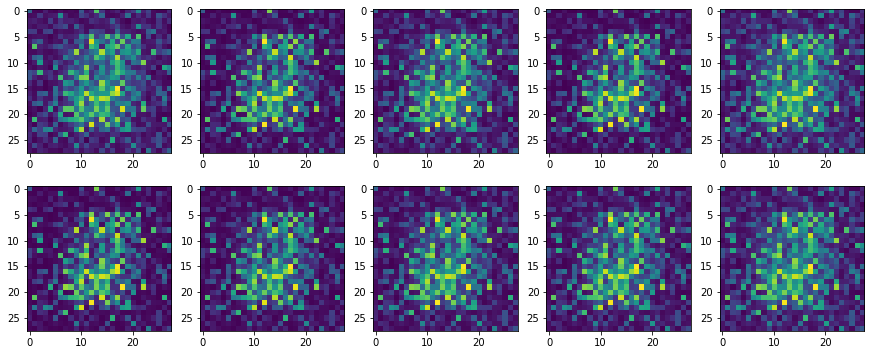

In [39]:
import numpy as np

# 100차원 노이즈 입력을 10개 사용하여 10개의 숫자 손글씨 데이터를 생성
noise = tf.random.normal([10, 100])

output = gan_generator(noise)
output = np.squeeze(output.numpy())

# 시각화
plt.figure(figsize=(15,6))
for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.imshow(output[i-1])

#### 500 Epoch 학습한 가중치 적용

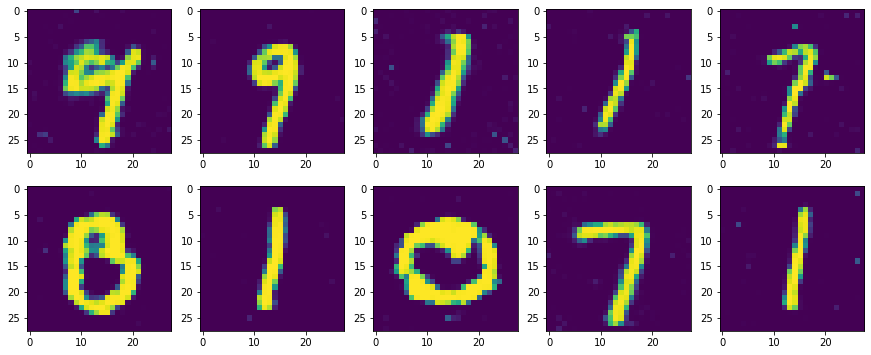

In [40]:
import os
weight_path = os.getenv('HOME')+'/aiffel/conditional_generation/gan/GAN_500'

noise = tf.random.normal([10, 100]) 

gan_generator = GeneratorGAN()
gan_generator.load_weights(weight_path)

output = gan_generator(noise)
output = np.squeeze(output.numpy())

plt.figure(figsize=(15,6))
for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.imshow(output[i-1])

이러한 방법으로는 내가 원하는 특정 숫자 하나를 출력하기 위해 수많은 입력을 넣어야 할 수 있다.  
내가 원하는 숫자를 바로 얻어내기 위해 아래에서 cGAN을 학습 시켜 봅시다.

### cGAN으로 MNIST 학습하기

In [65]:
#위에 있는 gan_step()을 참고해서 cgan_step을 완성해주세요.

cgan_generator = GeneratorCGAN()
cgan_discriminator = DiscriminatorCGAN()

@tf.function()
def cgan_step(real_images, labels):
    # 입력으로 사용되는 노이즈를 100차원으로 설정
    noise = tf.random.normal([real_images.shape[0], 100])
    
    with tf.GradientTape(persistent=True) as tape:
        # Generator를 이용해 가짜 이미지 생성
        fake_images = cgan_generator(noise, labels)
        # Discriminator를 이용해 진짜 및 가짜이미지를 각각 판별
        real_out = cgan_discriminator(real_images, labels)
        fake_out = cgan_discriminator(fake_images, labels)
        # 각 손실(loss)을 계산
        gene_loss = generator_loss(fake_out)
        disc_loss = discriminator_loss(real_out, fake_out)
    
    # gradient 계산
    gene_grad = tape.gradient(gene_loss, cgan_generator.trainable_variables)
    disc_grad = tape.gradient(disc_loss, cgan_discriminator.trainable_variables)
    # 모델 학습
    gene_opt.apply_gradients(zip(gene_grad, cgan_generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_grad, cgan_discriminator.trainable_variables))
    return gene_loss, disc_loss

# 1 epoch만 학습
EPOCHS = 1
for epoch in range(1, EPOCHS+1):
    for i, temp in enumerate(cgan_datasets):
        images, labels = temp
        gene_loss, disc_loss = cgan_step(images, labels)

        if (i+1) % 100 == 0:
            # 100번의 반복마다 각 손실(loss)을 출력
            print(f"[{epoch}/{EPOCHS} EPOCHS, {i+1} ITER] G:{gene_loss}, D:{disc_loss}")


[1/1 EPOCHS, 100 ITER] G:5.818133354187012, D:0.004627370275557041
[1/1 EPOCHS, 200 ITER] G:5.030943870544434, D:0.008405753411352634
[1/1 EPOCHS, 300 ITER] G:5.002300262451172, D:0.017843669280409813
[1/1 EPOCHS, 400 ITER] G:3.7092061042785645, D:0.11720409989356995


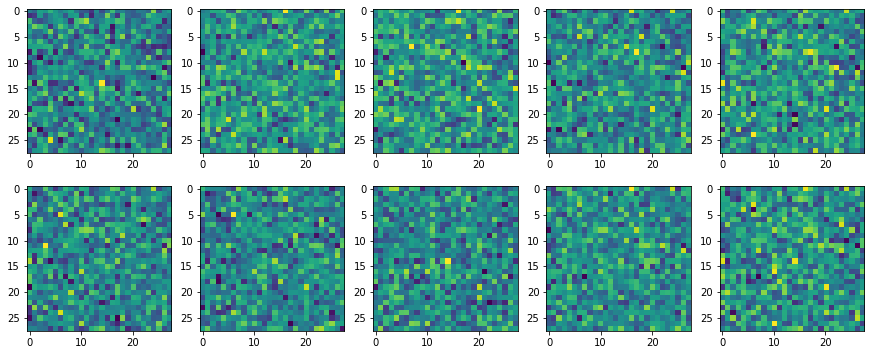

In [66]:
# 1Epoch 학습 모델로 생성 테스트
number =  7 

noise = tf.random.normal([10, 100])

label = tf.one_hot(number, 10)
label = tf.expand_dims(label, axis=0)
label = tf.repeat(label, 10, axis=0)

generator = GeneratorCGAN()

output = generator(noise, label)
output = np.squeeze(output.numpy())

plt.figure(figsize=(15,6))
for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.imshow(output[i-1])

#### 500 Epoch 학습한 가중치 적용

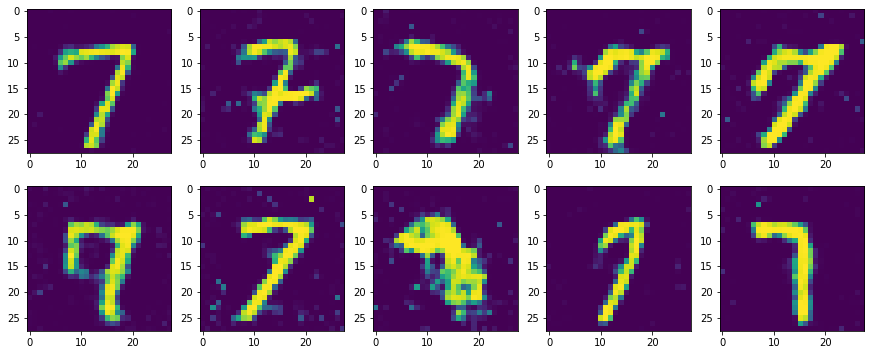

In [67]:
number =  7 # 생성할 숫자

weight_path = os.getenv('HOME')+'/aiffel/conditional_generation/cgan/CGAN_500'

noise = tf.random.normal([10, 100])

label = tf.one_hot(number, 10)
label = tf.expand_dims(label, axis=0)
label = tf.repeat(label, 10, axis=0)

generator = GeneratorCGAN()
generator.load_weights(weight_path)

output = generator(noise, label)
output = np.squeeze(output.numpy())

plt.figure(figsize=(15,6))
for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.imshow(output[i-1])